In [2]:
Authors: Johannes Wiesel, Erica Zhang
Version: June 30, 2022

In [2]:
# import dependencies
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
import scipy as scipy 
from ot.datasets import make_2D_samples_gauss as gauss2
from scipy.stats import dirichlet
import math
from numpy import random
from scipy import stats
from itertools import product
from scipy.spatial.distance import cdist

In [3]:
# import 'time' to evaluate run-time
import time

In [4]:
# import function packages
from Histograms import *
from Optimization import *

In [5]:
# Plot Example 1.0
# Plot sample mean for each method; plot 95% confidence band.

# source a size is size_a
size_a = 100
# source b size is size_b
size_b = 100
# target_size
target_size = 100
# variance grid partition size is g
g = 10
# sampling size
n = 3
# x-axis (variance): we start at 0.1 since variance cannot be equal to 0
x = np.linspace(0.1,2,g)
# grid for non-dirichlet methods
p = 10
# method for choosing alpha
method = "random"


# source_b histogram
b_result = gauss1D(size_b,0,1)
b_hist = b_result[1]
b_grid = b_result[0]
# source_b samples
b_samples = np.random.normal(0, 1, size=size_b)
# source_a grid
a_grid = np.arange(size_a, dtype=np.float64)-size_a/2 

# create lists
y_hist = []
ci_lower_hist = []
ci_upper_hist = []
y_samples = []
ci_lower_samples = []
ci_upper_samples = []
y_dir = []
ci_lower_dir = []
ci_upper_dir = []
y_dir_alt = []
ci_lower_dir_alt = []
ci_upper_dir_alt = []
hist_method_time = []
samples_method_time = []
dir_method_time = []
dir_alt_time = []

for i in range(g):
    a_result = gauss1D(size_a,0,x[i])
    a = a_result[1]
    
    # 1. Histogram Method
    start_time = time.time()
    inf = sample_inference(N = n, a=a,b=b_hist,a_grid = a_grid, b_grid = b_grid, p = p, target_size = target_size, op_method = "Hist", method = method)
    
    #print(inf)
    
    runtime = time.time() - start_time
    hist_method_time.append(runtime)
    result = inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_hist.append(result)
    ci_lower_hist.append(ci_lower)
    ci_upper_hist.append(ci_upper)
    
    # 2. Samples Method
    a = np.random.normal(0, x[i], size=size_a)  # generate samples for source_a
    start_time = time.time()
    inf = sample_inference(N = n,a=a,b=b_samples, p=p, target_size = target_size, op_method = "Samples", method = method)
    
    #print(inf)
    
    
    runtime = time.time() - start_time
    samples_method_time.append(runtime)
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_samples.append(result)
    ci_lower_samples.append(ci_lower)
    ci_upper_samples.append(ci_upper)
    
    # 3. Dirichlet (Random Selection) Method
    start_time = time.time()
    inf = sample_inference(N = n, a=a,b=b_samples, target_size = target_size, op_method = "Dirichlet Random", method = method)
    
    #print(inf)
    
    runtime = time.time() - start_time
    dir_method_time.append(runtime)
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_dir.append(result)
    ci_lower_dir.append(ci_lower)
    ci_upper_dir.append(ci_upper)
    
    # 4. Dirichlet Method
    start_time = time.time()
    inf = sample_inference(N = n, a=a,b=b_samples, target_size = target_size, op_method = "Dirichlet", method = method)
    
    #print(inf)
    
    runtime = time.time() - start_time
    dir_alt_time.append(runtime)
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_dir_alt.append(result)
    ci_lower_dir_alt.append(ci_lower)
    ci_upper_dir_alt.append(ci_upper)
    
    

# conversion to ndarray
y_hist = np.array(y_hist)
ci_lower_hist = np.array(ci_lower_hist)
ci_upper_hist = np.array(ci_upper_hist)
y_samples = np.array(y_samples)
ci_lower_samples = np.array(ci_lower_samples)
ci_upper_samples = np.array(ci_upper_samples)
y_dir = np.array(y_dir)
ci_lower_dir = np.array(ci_lower_dir)
ci_upper_dir = np.array(ci_upper_dir)
y_dir_alt = np.array(y_dir_alt)
ci_lower_dir_alt = np.array(ci_lower_dir_alt)
ci_upper_dir_alt = np.array(ci_upper_dir_alt)
hist_method_time = np.array(hist_method_time)
samples_method_time = np.array(samples_method_time)
dir_method_time = np.array(dir_method_time)
dir_alt_time = np.array(dir_alt_time)



[-0.7012279341734987, 0.008778451489231908, [-0.7184333829324252, -0.6840224854145722], -0.7223129228773346]
[-0.6456630521929471, 0.006811153262475333, [-0.6590126672805812, -0.632313437105313], -0.6594327860447109]
[-0.6019380862264417, 0.0013891713719768454, [-0.6046608120838705, -0.599215360369013], -0.605324969672612]
[-0.6956169763759578, 0.0005834305337034117, [-0.6967604792094975, -0.6944734735424181], -0.6966597904166585]
[-0.6768167915032226, 0.004147897653295334, [-0.6849465215152397, -0.6686870614912055], -0.6869733632055042]
[-0.4997744746479613, 0.002320936457444133, [-0.5043234265149578, -0.4952255227809648], -0.5054437522231082]
[-0.4629789105005598, 0.0035063292027324522, [-0.4698511894558564, -0.45610663154526315], -0.4709204302309125]
[-0.534968626310354, 0.00034125305496746447, [-0.5356374700077046, -0.5342997826130035], -0.5356396796243403]
[-0.45181826222720906, 0.00915566898074384, [-0.46976304368383753, -0.4338734807705806], -0.47309916604731606]
[-0.34981255542

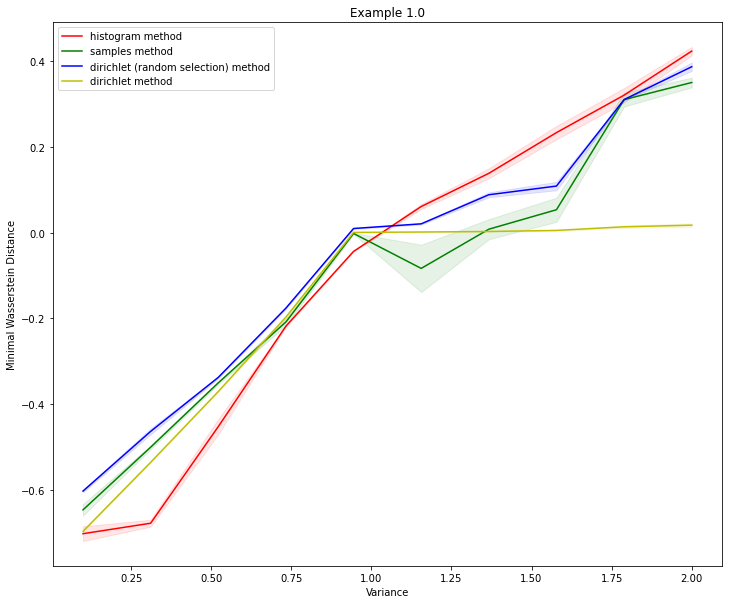

In [7]:
# Plot four curves in one graph

# Plotting both the curves simultaneously
pl.plot(x, y_hist, color='r', label='histogram method')
pl.fill_between(x, ci_lower_hist, ci_upper_hist, color='r', alpha=.1)
pl.plot(x, y_samples, color='g', label='samples method')
pl.fill_between(x, ci_lower_samples, ci_upper_samples, color='g', alpha=.1)
pl.plot(x, y_dir, color='b', label='dirichlet (random selection) method')
pl.fill_between(x, ci_lower_dir, ci_upper_dir, color='b', alpha=.1)
pl.plot(x, y_dir_alt, color='y', label='dirichlet method')
pl.fill_between(x, ci_lower_dir_alt, ci_upper_dir_alt, color='y', alpha=.1)

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Variance")
pl.ylabel("Minimal Wasserstein Distance")
pl.title("Example 1.0")

# Adding legend, which helps us recognize the curve according to it's color
pl.legend()

# Adjust Size

pl.rcParams['figure.figsize'] = [12, 10]

# To load the display window
pl.show()

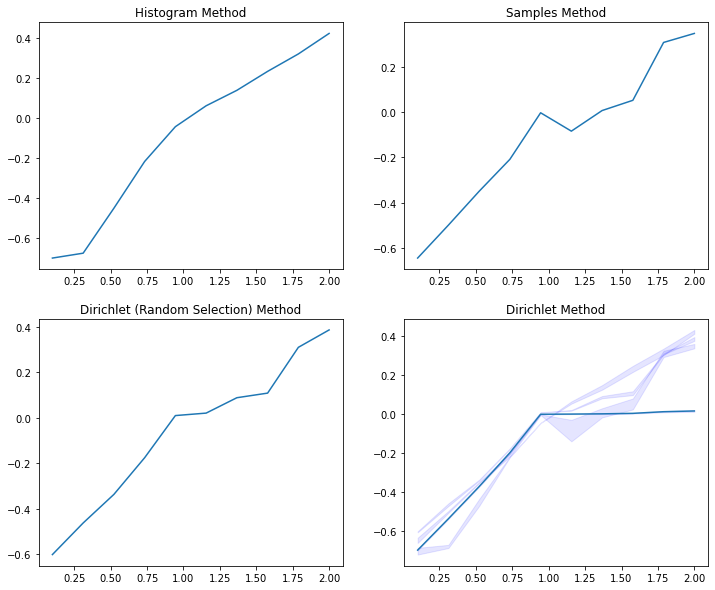

In [8]:
# Plot four graphs in a 2-by-2 grid

# Initialise the subplot function using number of rows and columns
figure, axis = pl.subplots(2, 2)
  
# For hist Method
axis[0, 0].plot(x, y_hist)
# plot 95% confidence band
pl.fill_between(x, ci_lower_hist, ci_upper_hist, color='b', alpha=.1)
axis[0, 0].set_title("Histogram Method")
  
# For samples Method
axis[0, 1].plot(x, y_samples)
# plot 95% confidence band
pl.fill_between(x, ci_lower_samples, ci_upper_samples, color='b', alpha=.1)
axis[0, 1].set_title("Samples Method")
  
# For dirichlet (random selection) Method
axis[1, 0].plot(x, y_dir)
# plot 95% confidence band
pl.fill_between(x, ci_lower_dir, ci_upper_dir, color='b', alpha=.1)
axis[1, 0].set_title("Dirichlet (Random Selection) Method")
  
# For dirichlet Method
axis[1, 1].plot(x, y_dir_alt)
# plot 95% confidence band
pl.fill_between(x, ci_lower_dir_alt, ci_upper_dir_alt, color='b', alpha=.1)
axis[1, 1].set_title("Dirichlet Method")
  
# change figure size
pl.rcParams['figure.figsize'] = [12, 10]

pl.show()

In [ ]:
# Plot runtime

X = np.arange(g)

# Plotting both the curves simultaneously
pl.plot(X, hist_method_time, color='g', label='hist method runtime')
pl.plot(X, samples_method_time, color='b', label='samples method runtime')
pl.plot(X, dir_method_time, color='b', label='dirichlet (random selection) method')
pl.plot(x, dir_alt_time, color='y', label='dirichlet method')

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Number of trials")
pl.ylabel("Runtime")
pl.title("Example 1.0")

# Adding legend, which helps us recognize the curve according to it's color
pl.legend()

# To load the display window
pl.show()

In [ ]:
# Plot Example 1.1 (d = 2)

# target_size
target_size = 100
# source a size is size_a
size_a = 100
# source b size is size_b
size_b = 100
# variance grid partition size is g
g = 10
# sampling size
n = 3
# x-axis
x = np.linspace(-1,1,g)
# grid for non-dirichlet methods
p = 3
# method for choosing alpha
method = "random"

# source_b samples
mu_b = np.array([0, 0])
cov_b = np.array([[1, 0], [0, 1]])
b_samples = ot.datasets.make_2D_samples_gauss(size_b, mu_b, cov_b)

# source_a mean is fixed
mu_a = np.array([0, 0])

# create lists
y_samples = []
ci_lower_samples = []
ci_upper_samples = []
y_dir = []
ci_lower_dir = []
ci_upper_dir = []
y_dir_alt = []
ci_lower_dir_alt = []
ci_upper_dir_alt = []
samples_method_time = []
dir_method_time = []
dir_alt_time = []


for i in range(g):
    
    # generate samples for source_a distribution
    cov_a = np.array([[x[i], 0], [0, x[i]]])
    a = ot.datasets.make_2D_samples_gauss(size_a, mu_a, cov_a)    

    # 1. Generate graph for Sample method
    start_time = time.time()
    inf = sample_inference(N = n,a=a,b=b_samples, p=p, target_size = target_size, op_method = "Samples", method = method)
    runtime = time.time() - start_time
    samples_method_time.append(runtime)
    
    #print(inf)
    
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_samples.append(result)
    ci_lower_samples.append(ci_lower)
    ci_upper_samples.append(ci_upper)

    # 2. Generate graph for Dirichlet (random selection) method
    start_time = time.time()
    inf = sample_inference(N = n, a=a,b=b_samples, target_size = target_size, op_method = "Dirichlet Random", method = method)
    runtime = time.time() - start_time
        
    #print(inf)
    
    dir_method_time.append(runtime)
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_dir.append(result)
    ci_lower_dir.append(ci_lower)
    ci_upper_dir.append(ci_upper)


    # 3. Generate graph for Dirichlet (alternative) method
    start_time = time.time()
    inf = sample_inference(N = n, a=a,b=b_samples, target_size = target_size, op_method = "Dirichlet", method = method)
    runtime = time.time() - start_time
        
    #print(inf)
    
    dir_alt_time.append(runtime)
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_dir_alt.append(result)
    ci_lower_dir_alt.append(ci_lower)
    ci_upper_dir_alt.append(ci_upper)


    
y_samples = np.array(y_samples)
ci_lower_samples = np.array(ci_lower_samples)
ci_upper_samples = np.array(ci_upper_samples)
y_dir = np.array(y_dir)
ci_lower_dir = np.array(ci_lower_dir)
ci_upper_dir = np.array(ci_upper_dir)
y_dir_alt = np.array(y_dir_alt)
ci_lower_dir_alt = np.array(ci_lower_dir_alt)
ci_upper_dir_alt = np.array(ci_upper_dir_alt)
samples_method_time = np.array(samples_method_time)
dir_method_time = np.array(dir_method_time)
dir_alt_time = np.array(dir_alt_time)




In [ ]:
# Plot three curves in one graph

# Plotting both the curves simultaneously
pl.plot(x, y_samples, color='g', label='samples method')
pl.fill_between(x, ci_lower_samples, ci_upper_samples, color='g', alpha=.1)
pl.plot(x, y_dir, color='b', label='dirichlet (random selection) method')
pl.fill_between(x, ci_lower_dir, ci_upper_dir, color='b', alpha=.1)
pl.plot(x, y_dir_alt, color='y', label='dirichlet method')
pl.fill_between(x, ci_lower_dir_alt, ci_upper_dir_alt, color='y', alpha=.1)

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Variance")
pl.ylabel("Minimal Wasserstein Distance")
pl.title("Example 1.1")

# Adding legend, which helps us recognize the curve according to it's color
pl.legend()

# To load the display window
pl.show()

In [ ]:
# Plot three graphs separately

# Initialise the subplot function using number of rows and columns
figure, axis = pl.subplots(3, 1)
  
axis[0].plot(x, y_samples)
# plot 95% confidence band
ax.fill_between(x, ci_lower_samples, ci_upper_samples, color='b', alpha=.1)
axis[0].set_title("Samples Method")
  
# For dirichlet (random selection) Method
axis[1].plot(x, y_dir)
# plot 95% confidence band
ax.fill_between(x, ci_lower_dir, ci_upper_dir, color='b', alpha=.1)
axis[1].set_title("Dirichlet (Random Selection) Method")
  
# For dirichlet Method
axis[2].plot(x, y_dir_alt)
# plot 95% confidence band
ax.fill_between(x, ci_lower_dir_alt, ci_upper_dir_alt, color='b', alpha=.1)
axis[2].set_title("Dirichlet Method")
  
# change figure size
pl.rcParams['figure.figsize'] = [12, 10]

pl.show()

In [ ]:
# Plot Example 2.0
# Plot sample mean for each method; plot 95% confidence band.

# target_size
target_size = 100
# source a size is size_a
size_a = 100
# source b size is size_b
size_b = 100
# variance grid partition size is g
g = 10
# sampling size
n = 3
# x-axis
x = np.linspace(-1,1,g)
# grid for non-dirichlet methods
p = 10
# method for choosing alpha
method = "random"


# source_b histogram
result_b = combined_dirac(x = [-1,1], n = size_b)
b_grid = result_b[0]
b_hist = result_b[1]
# source_b samples
b_samples = random.choice([-1,1],size_b)

# create lists
y_hist = []
ci_lower_hist = []
ci_upper_hist = []
y_samples = []
ci_lower_samples = []
ci_upper_samples = []
y_dir = []
ci_lower_dir = []
ci_upper_dir = []
y_dir_alt = []
ci_lower_dir_alt = []
ci_upper_dir_alt = []
hist_method_time = []
samples_method_time = []
dir_method_time = []
dir_alt_time = []


for i in range(g):
    result_a = combined_dirac(x = [-1-x[i],1+x[i]], n = size_a)
    a_grid = result_a[0]
    a = result_a[1]
    
    # 1. Histogram Method
    start_time = time.time()
    inf = sample_inference(N = n, a=a,b=b_hist,a_grid = a_grid, b_grid = b_grid, p=p, target_size = target_size, op_method = "Hist", method = method)
    runtime = time.time() - start_time
        
    #print(inf)
    
    hist_method_time.append(runtime)
    result = inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_hist.append(result)
    ci_lower_hist.append(ci_lower)
    ci_upper_hist.append(ci_upper)

    # 2. Generate graph for Sample method
    a = random.choice([-1-x[i],1+x[i]],size_a) # generate samples for source_a
    start_time = time.time()
    inf = sample_inference(N = n,a=a,b=b_samples, p=p, target_size = target_size, op_method = "Samples", method = method)
    runtime = time.time() - start_time
        
    #print(inf)
    
    samples_method_time.append(runtime)
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_samples.append(result)
    ci_lower_samples.append(ci_lower)
    ci_upper_samples.append(ci_upper)


    # 3. Generate graph for Dirichlet (random selection) method
    start_time = time.time()
    inf = sample_inference(N = n, a=a,b=b_samples, target_size = target_size, op_method = "Dirichlet Random", method = method)
    runtime = time.time() - start_time
        
    #print(inf)
    
    dir_method_time.append(runtime)
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_dir.append(result)
    ci_lower_dir.append(ci_lower)
    ci_upper_dir.append(ci_upper)


    # 4. Generate graph for Dirichlet (alternative) method
    start_time = time.time()
    inf = sample_inference(N = n, a=a,b=b_samples, target_size = target_size, op_method = "Dirichlet", method = method)
    runtime = time.time() - start_time
        
    #print(inf)
    
    dir_alt_time.append(runtime)
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_dir_alt.append(result)
    ci_lower_dir_alt.append(ci_lower)
    ci_upper_dir_alt.append(ci_upper)


y_hist = np.array(y_hist)
ci_lower_hist = np.array(ci_lower_hist)
ci_upper_hist = np.array(ci_upper_hist)
y_samples = np.array(y_samples)
ci_lower_samples = np.array(ci_lower_samples)
ci_upper_samples = np.array(ci_upper_samples)
y_dir = np.array(y_dir)
ci_lower_dir = np.array(ci_lower_dir)
ci_upper_dir = np.array(ci_upper_dir)
y_dir_alt = np.array(y_dir_alt)
ci_lower_dir_alt = np.array(ci_lower_dir_alt)
ci_upper_dir_alt = np.array(ci_upper_dir_alt)
hist_method_time = np.array(hist_method_time)
samples_method_time = np.array(samples_method_time)
dir_method_time = np.array(dir_method_time)
dir_alt_time = np.array(dir_alt_time)



In [ ]:
# Plot four curves in one graph

# Plotting both the curves simultaneously
pl.plot(x, y_hist, color='r', label='histogram method')
pl.fill_between(x, ci_lower_hist, ci_upper_hist, color='r', alpha=.1)
pl.plot(x, y_samples, color='g', label='samples method')
pl.fill_between(x, ci_lower_samples, ci_upper_samples, color='g', alpha=.1)
pl.plot(x, y_dir, color='b', label='dirichlet (random selection) method')
pl.fill_between(x, ci_lower_dir, ci_upper_dir, color='b', alpha=.1)
pl.plot(x, y_dir_alt, color='y', label='dirichlet method')
pl.fill_between(x, ci_lower_dir_alt, ci_upper_dir_alt, color='y', alpha=.1)

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Variance")
pl.ylabel("Minimal Wasserstein Distance")
pl.title("Example 2.0")

# Adding legend, which helps us recognize the curve according to it's color
pl.legend()

# To load the display window
pl.show()

In [ ]:
# Plot four graphs in a 2-by-2 grid

# Initialise the subplot function using number of rows and columns
figure, axis = pl.subplots(2, 2)
  
# For hist Method
axis[0, 0].plot(x, y_hist)
# plot 95% confidence band
ax.fill_between(x, ci_lower_hist, ci_upper_hist, color='b', alpha=.1)
axis[0, 0].set_title("Histogram Method")
  
# For samples Method
axis[0, 1].plot(x, y_samples)
# plot 95% confidence band
ax.fill_between(x, ci_lower_samples, ci_upper_samples, color='b', alpha=.1)
axis[0, 1].set_title("Samples Method")
  
# For dirichlet (random selection) Method
axis[1, 0].plot(x, y_dir)
# plot 95% confidence band
ax.fill_between(x, ci_lower_dir, ci_upper_dir, color='b', alpha=.1)
axis[1, 0].set_title("Dirichlet (Random Selection) Method")
  
# For dirichlet Method
axis[1, 1].plot(x, y_dir_alt)
# plot 95% confidence band
ax.fill_between(x, ci_lower_dir_alt, ci_upper_dir_alt, color='b', alpha=.1)
axis[1, 1].set_title("Dirichlet Method")
  
# change figure size
pl.rcParams['figure.figsize'] = [12, 10]

pl.show()

In [ ]:
# Plot runtime

X = np.arange(g)

# Plotting both the curves simultaneously
pl.plot(X, hist_method_time, color='g', label='hist method runtime')
pl.plot(X, samples_method_time, color='b', label='samples method runtime')
pl.plot(X, dir_method_time, color='b', label='dirichlet (random selection) method')
pl.plot(x, dir_alt_time, color='y', label='dirichlet method')

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Number of trials")
pl.ylabel("Runtime")
pl.title("Example 2.0")

# Adding legend, which helps us recognize the curve according to it's color
pl.legend()

# To load the display window
pl.show()

In [ ]:
# Plot Example 3.0
# Plot sample mean for each method; plot 95% confidence band.

# target_size
target_size = 100
# source a size is size_a
size_a = 100
# source b size is size_b
size_b = 100
# variance grid partition size is g
g = 10
# sampling size
n = 3
# x-axis
x = np.linspace(-1,1,g)
# grid for non-dirichlet methods
p = 2
# method for choosing alpha
method = "random"


# source_b support
b_ls = np.array([[-1,0],[1,0],[0,1],[0,-1]])
# uniform distribution on all coordinates listed in b_ls
generate_indx = random.choice([0,1,2,3],size_b)
# samples
b = b_ls[generate_indx]

# create lists
y_samples = []
ci_lower_samples = []
ci_upper_samples = []
y_dir = []
ci_lower_dir = []
ci_upper_dir = []
y_dir_alt = []
ci_lower_dir_alt = []
ci_upper_dir_alt = []
hist_method_time = []
samples_method_time = []
dir_method_time = []
dir_alt_time = []

for i in range(g):
    # source_a support
    a_ls = np.array([[-1-x[i],0],[1+x[i],0],[0,1+x[i]],[0,-1-x[i]]])
    # uniform distribution on all coordinates listed in b_ls
    generate_indx = random.choice([0,1,2,3],size_a)
    # samples
    a = a_ls[generate_indx]
    
    # 1. Samples Method
    start_time = time.time()
    inf = sample_inference(N = n,a=a,b=b,p=p,target_size = target_size, op_method = "Samples", method = method)
    runtime = time.time() - start_time
    samples_method_time.append(runtime)
        
    #print(inf)
    
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_samples.append(result)
    ci_lower_samples.append(ci_lower)
    ci_upper_samples.append(ci_upper)
    
    # 2. Dirichlet (Random Sampling) Method
    start_time = time.time()
    inf = sample_inference(N = n,a=a,b=b,target_size = target_size, op_method = "Dirichlet Random", method = method)
    runtime = time.time() - start_time
    dir_method_time.append(runtime)
        
    #print(inf)
    
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_dir.append(result)
    ci_lower_dir.append(ci_lower)
    ci_upper_dir.append(ci_upper)
    
    # 3. Dirichlet Method
    start_time = time.time()
    inf = sample_inference(N = n,a=a,b=b,target_size = target_size, op_method = "Dirichlet", method = method)
    runtime = time.time() - start_time
    dir_alt_time.append(runtime)
        
    #print(inf)
    
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_dir_alt.append(result)
    ci_lower_dir_alt.append(ci_lower)
    ci_upper_dir_alt.append(ci_upper)



y_samples = np.array(y_samples)
ci_lower_samples = np.array(ci_lower_samples)
ci_upper_samples = np.array(ci_upper_samples)
y_dir = np.array(y_dir)
ci_lower_dir = np.array(ci_lower_dir)
ci_upper_dir = np.array(ci_upper_dir)
y_dir_alt = np.array(y_dir_alt)
ci_lower_dir_alt = np.array(ci_lower_dir_alt)
ci_upper_dir_alt = np.array(ci_upper_dir_alt)
samples_method_time = np.array(samples_method_time)
dir_method_time = np.array(dir_method_time)
dir_alt_time = np.array(dir_alt_time)



In [ ]:
# Plot three curves in one graph

# Plotting both the curves simultaneously
pl.plot(x, y_samples, color='g', label='samples method')
pl.fill_between(x, ci_lower_samples, ci_upper_samples, color='g', alpha=.1)
pl.plot(x, y_dir, color='b', label='dirichlet (random selection) method')
pl.fill_between(x, ci_lower_dir, ci_upper_dir, color='b', alpha=.1)
pl.plot(x, y_dir_alt, color='y', label='dirichlet method')
pl.fill_between(x, ci_lower_dir_alt, ci_upper_dir_alt, color='y', alpha=.1)

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Variance")
pl.ylabel("Minimal Wasserstein Distance")
pl.title("Example 3.0")

# Adding legend, which helps us recognize the curve according to it's color
pl.legend()

# To load the display window
pl.show()

In [ ]:
# Plot three graphs separately

# Initialise the subplot function using number of rows and columns
figure, axis = pl.subplots(3, 1)
  
axis[0].plot(x, y_samples)
# plot 95% confidence band
ax.fill_between(x, ci_lower_samples, ci_upper_samples, color='b', alpha=.1)
axis[0].set_title("Samples Method")
  
# For dirichlet (random selection) Method
axis[1].plot(x, y_dir)
# plot 95% confidence band
ax.fill_between(x, ci_lower_dir, ci_upper_dir, color='b', alpha=.1)
axis[1].set_title("Dirichlet (Random Selection) Method")
  
# For dirichlet Method
axis[2].plot(x, y_dir_alt)
# plot 95% confidence band
ax.fill_between(x, ci_lower_dir_alt, ci_upper_dir_alt, color='b', alpha=.1)
axis[2].set_title("Dirichlet Method")
  
# change figure size
pl.rcParams['figure.figsize'] = [12, 10]

pl.show()

In [ ]:
# Plot runtime

X = np.arange(g)

# Plotting both the curves simultaneously
pl.plot(X, samples_method_time, color='b', label='samples method runtime')
pl.plot(X, dir_method_time, color='b', label='dirichlet (random selection) method')
pl.plot(x, dir_alt_time, color='y', label='dirichlet method')

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Number of trials")
pl.ylabel("Runtime")
pl.title("Example 3.0")

# Adding legend, which helps us recognize the curve according to it's color
pl.legend()

# To load the display window
pl.show()